In [1]:
import os, sys
import warnings
from CRS_funcs import temporal_profile_for_practices, all_temporal_profile, display_plots, AT_diff_SZN_barchart, AT_stats
####### 
input_dir="time_series/NI/merged/"

# 2016-2019 time series of vegetation indices to identify cover crops (CC) and crop residue (CR) on ASA plots (treatment) vs Test plots (control):  
- Vegetation Indices: maximize separation of features of interest. Broadband vs narrowband.  
- Limited to indices using wavelengths/bands covered by Sentinel AND Landsat (can't use Sentinel's red-edge bands).  

## <b>Cover crops:</b> identify CC on ASA plots (with standing CR) from Test plots without CC (with grazed CR)  
- <b>Temporal window:</b> NOV to FEB - after postrera harvest, CC is planted and dies off by February in dry years (can last as long as May?)  
- <b>Spectral window:</b> choose bands-> indices measuring green/live/photosynthetically active vegetation vs brown/dead/non-photosynthetically active vegetation  
1) <b>Enhanced Vegetation Index 2 (EVI2)</b> = 2.5 * ( NIR - RED) / ( NIR + (2.4 * RED + 1.0 )    
2) <b>Green-Chlorophyll Vegetation Index (GCVI)</b> = (NIR – GREEN) / (NIR + GREEN)  

<b> ASA with CC should have higher EVI & GCVI values than Test plots sans CC from NOV to FEB </b>


## <b>Crop residue:</b> differentiate ASA plots with standing crop residue from Test plots with grazed residue (leaving soil)  
- <b>Temporal window:</b> FEB to MAY - CR is left on both Test and ASA plots. Grazing occurs on Test, so once residue has been grazed on Test & CC dies on ASA around Feb, Test plot should have soil and ASA plot should have standing residue  
- <b>Spectral window:</b> soil and dead/dry veg look similar in visible and NIR parts of the spectrum, but lignin and cellulose in standing residue absorb SWIR2 light  
1) <b>Normalized Difference Tillage Index (NDTI)</b> = (SWIR1-SWIR2) / (SWIR1+SWIR2) First, the most prominent spectral difference between NPV and soil is the cellulose absorption feature in SWIR 2 wavelengths.   
2) <b>Normalized Burn Ratio (NBR)</b> = (SWIR2-NIR1) / (SWIR2+NIR) 

<b> ASA with CR should have higher NDTI & NBR values than Test plots sans CR from FEB to MAY </b>

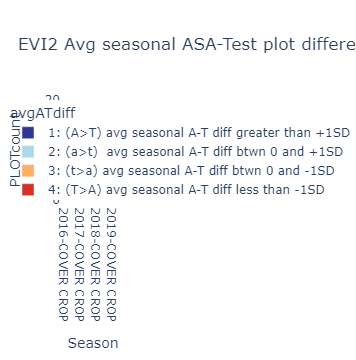

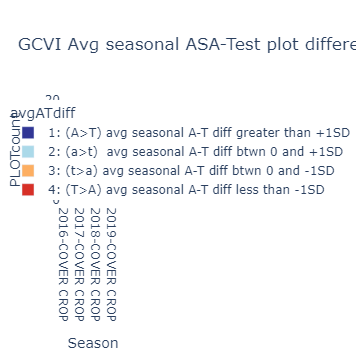

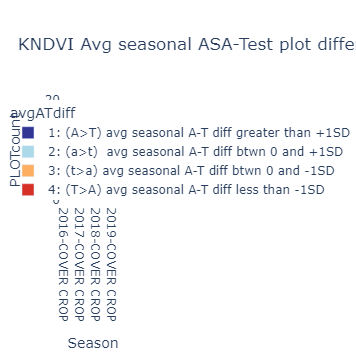

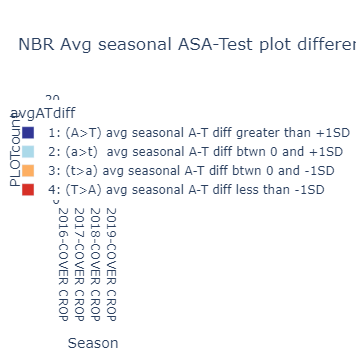

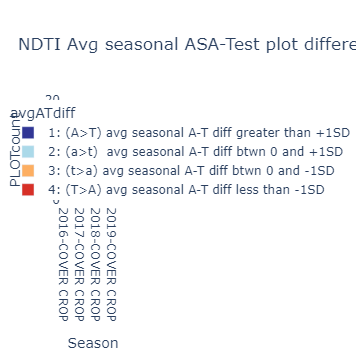

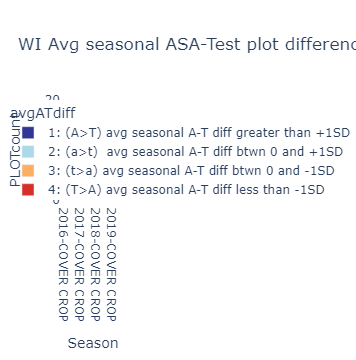

In [2]:
for dat in sorted(os.listdir(input_dir)):
        if dat.endswith('_merged_SZN_stats.csv'):
            AT_diff_SZN_barchart(input_dir + dat)

List of NI plots with practice data: NI_147, NI_192, NI_218, NI_248, NI_258, NI_295, NI_307, NI_313, NI_385, NI_407, NI_470, NI_480, NI_482, NI_581, NI_599, NI_634, NI_660, NI_697, NI_698  
List of ES plots with practice data: Part/SV-0Efp3f, Part/SV-7d01PS, Part/SV-A4fryE, Part/SV-Bbidgt, Part/SV-KLPAjn, Part/SV-LAx5RV, Part/SV-MzPH4V, Part/SV-NX2KiG, Part/SV-RBeWMK, Part/SV-V5Rucv, Part/SV-YihL4S, Part/SV-ZncYrJ, Part/SV-ZxmdrS, Part/SV-dZbLci, Part/SV-iAfkxt, Part/SV-jrYwT3, Part/SV-mZD9s4, Part/SV-oS60rF, Part/SV-qE9VaZ, Part/SV-srgr52

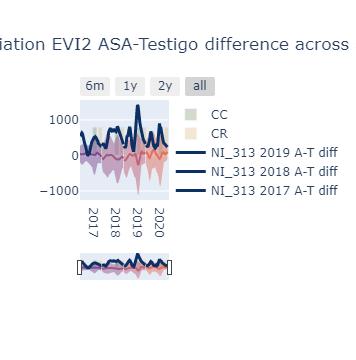

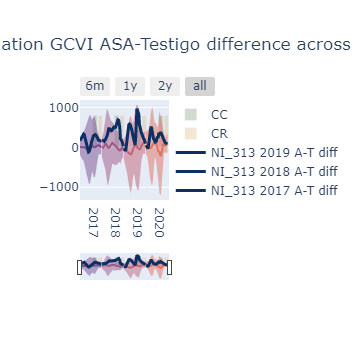

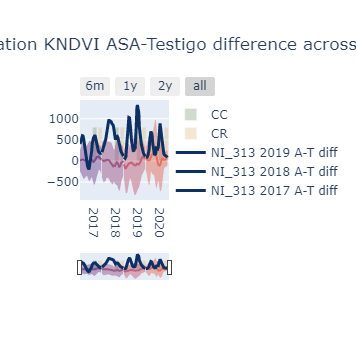

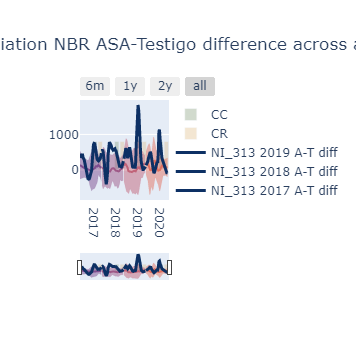

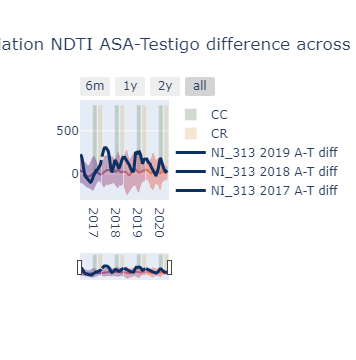

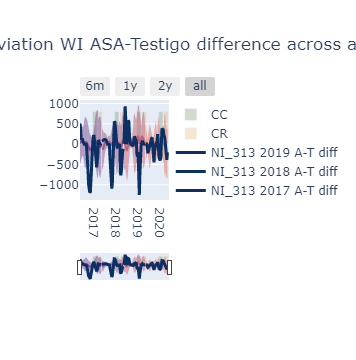

In [3]:
FieldID="NI_313"
##########################################
for i in sorted(os.listdir(input_dir)):
        if i.endswith('_merged.csv'):
            AT_stats(input_dir + i, FieldID)

## Nicaragua grids: '002225','002387','002388','002548','002549','002550'  (** fix 2387. include two leading zeros)
## List of indices = ['evi2', 'gcvi', 'kndvi', 'ndti', 'wi', 'nbr']

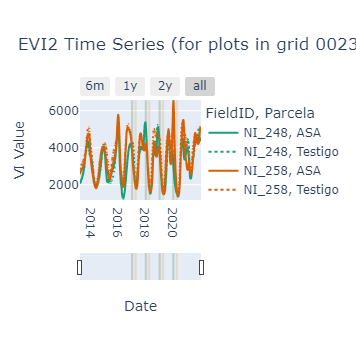

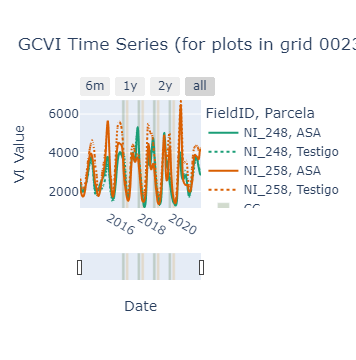

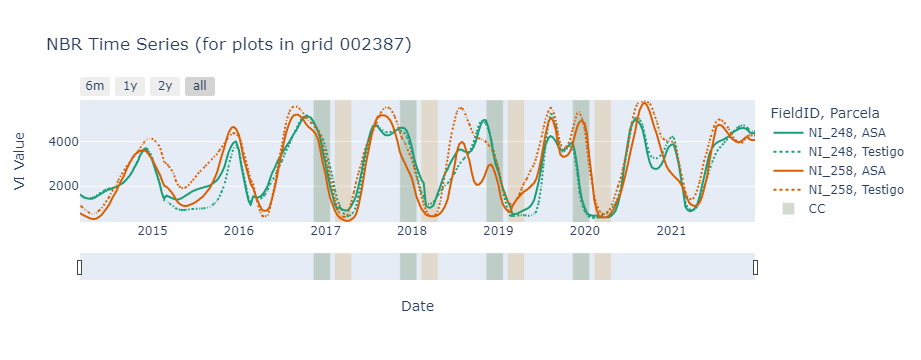

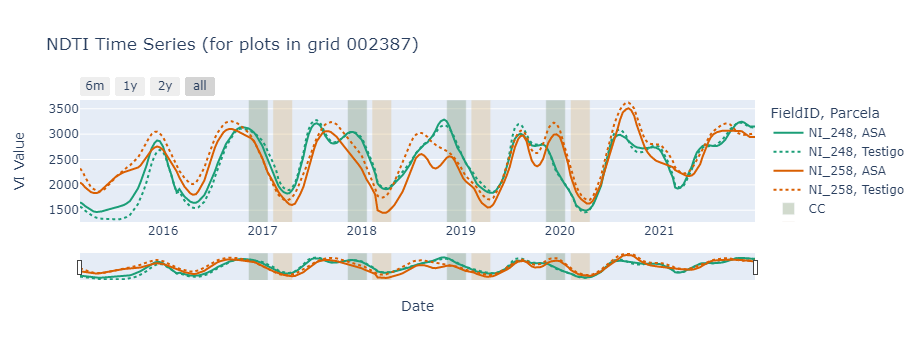

Map(center=[13.16730534800007, -86.16661184399999], close_popup_on_click=False, controls=(AttributionControl(o…

In [4]:
display_plots('002387', ['evi2', 'gcvi', 'nbr', 'ndti'], practicedb=False)

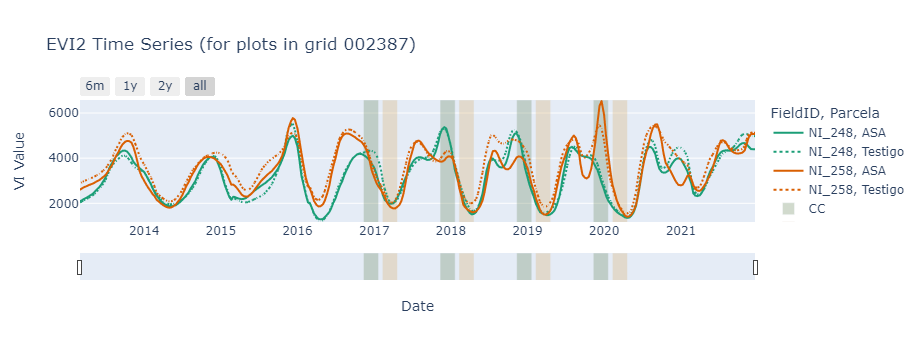

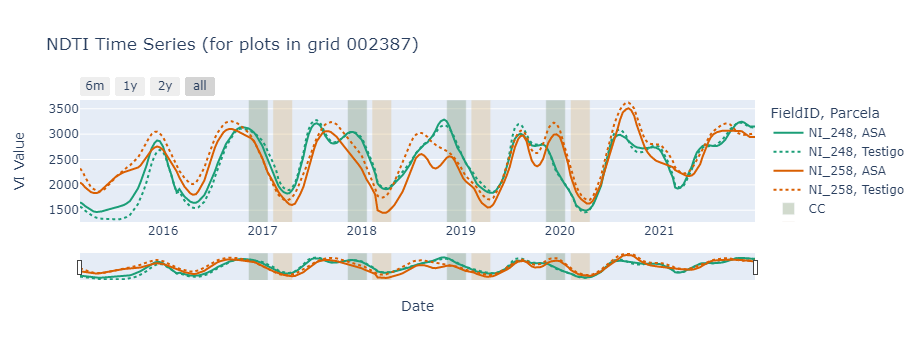

In [5]:
temporal_profile_for_practices('002387', ['evi2', 'ndti'])